In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sns
import datetime
import numpy as np

In [2]:
def pasar_a_datetime(fecha):
    #format_string = '%Y-%m-%d'
    anio,mes,dia= fecha.split('-')
    aux_dia = dia.split(' ')
    if len(aux_dia)>1:dia = aux_dia[0]
    res = datetime.datetime(int(anio),int(mes),int(dia))
    return res

In [3]:
encuestas = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/getting_data/encuestas/Encuestas_clean.csv')
ballojate = pd.read_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/getting_data/encuestas/Encuestas_solo_ballotaje.csv')

In [4]:
ballojate['Inicio'] = ballojate['Inicio'].map(lambda x:pasar_a_datetime(x))
ballojate['Final'] = ballojate['Final'].map(lambda x:pasar_a_datetime(x))
encuestas['Inicio'] = encuestas['Inicio'].map(lambda x:pasar_a_datetime(x))
encuestas['Final'] = encuestas['Final'].map(lambda x:pasar_a_datetime(x))

In [5]:
ballojate.sort_values(by='Inicio',ascending=True,inplace=True)
ejex = np.arange(len(ballojate))
encuestas.sort_values(by='Inicio',ascending=True,inplace=True)
ejex = np.arange(len(encuestas))

In [6]:
partidos = ballojate.columns[:2]
partidos = encuestas.columns[:5]

Elimino el dato de las elecciones oficiales

In [7]:
encuestas = encuestas.iloc[:-1,:]

In [8]:
ballojate = ballojate.iloc[:-1,:]

Y si tomo las media para fechas repetidas?

In [9]:
encuestas.columns

Index(['Union por la Patria', 'Juntos por el Cambio', 'La Libertad Avanza',
       'Hacemos juntos nuestro Pais', 'Frente de Izquierda y Trabajadores',
       'Inicio', 'Final'],
      dtype='object')

In [10]:
ballojate.columns

Index(['La Libertad Avanza', 'Union por la Patria', 'Inicio', 'Final'], dtype='object')

In [11]:
ballotaje_median = ballojate.groupby(['Inicio','Final']).mean().reset_index()
encuestas_median= encuestas.groupby(['Inicio','Final']).mean().reset_index()

Text(0, 0.5, 'Porcentaje')

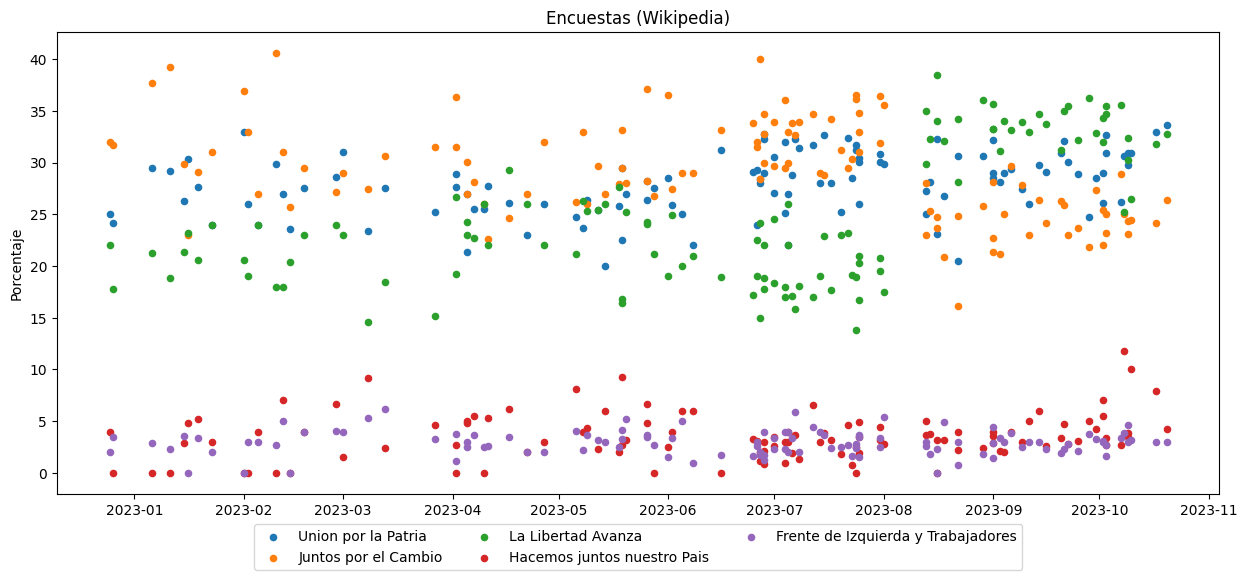

In [12]:
plt.figure(figsize=(15,6))
for p in partidos:
    plt.scatter(encuestas_median['Inicio'],encuestas_median[p],label = p,s=20)
#plt.legend(loc='upper right',bbox_to_anchor=(1.4, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Encuestas (Wikipedia)')
plt.ylabel('Porcentaje')

In [13]:
cols_e = encuestas_median.columns.tolist()
cols_b = ballotaje_median.columns.tolist()

In [14]:
orden_cols_b = cols_b[2:]+cols_b[:2]
orden_cols_e = cols_e[2:]+cols_e[:2]

In [15]:
ballotaje_median = ballotaje_median[orden_cols_b]
encuestas_median = encuestas_median[orden_cols_e]

In [16]:
#encuestas_median.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/getting_data/encuestas/Encuestas_clean_median.csv',index=False)

# Ajuste polinomial encuestas (median)

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Primera vuelta

In [18]:
grado =4
encuestas_polinomio_partidos = []

In [19]:
partidos

Index(['Union por la Patria', 'Juntos por el Cambio', 'La Libertad Avanza',
       'Hacemos juntos nuestro Pais', 'Frente de Izquierda y Trabajadores'],
      dtype='object')

Text(0, 0.5, 'Porcentaje')

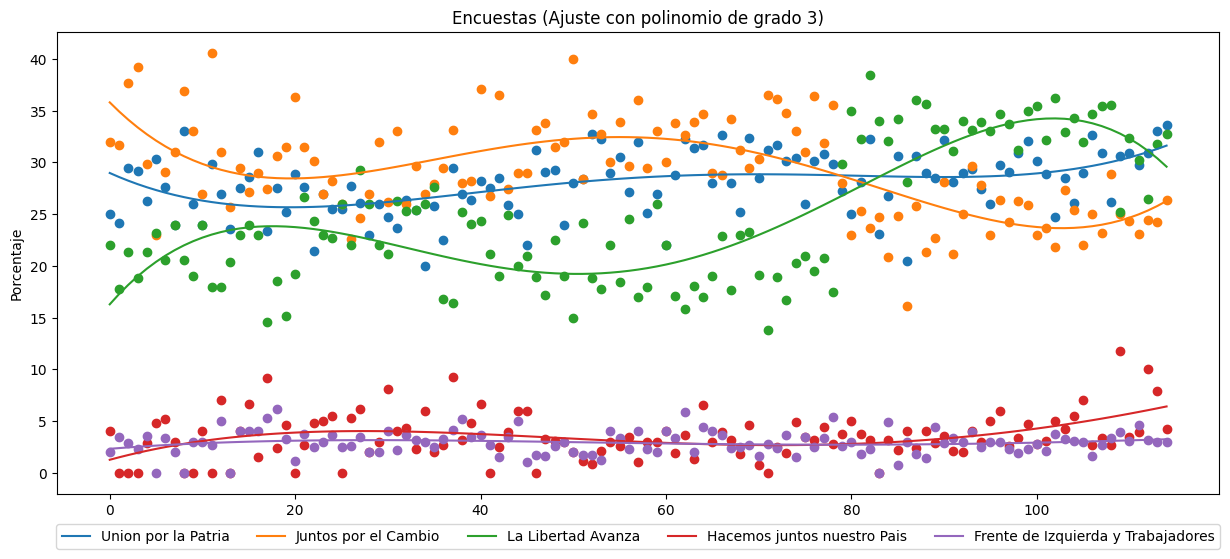

In [20]:
ejex = np.arange(len(encuestas_median))
plt.figure(figsize=(15,6))
for p in partidos:
    
    poly_reg_model = LinearRegression()
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    poly_features = poly.fit_transform(ejex.reshape(-1, 1))

    y = encuestas_median[p].to_numpy()
    poly_reg_model.fit(poly_features, y)
    #X_=np.linspace(ejex.min(), ejex.max(), 200).reshape(-1, 1)
    Y_=poly_reg_model.predict(poly_features)

    encuestas_polinomio_partidos.append(Y_)

    plt.plot(ejex, Y_,label=p)
    plt.scatter(ejex,encuestas_median[p])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=5)
plt.title('Encuestas (Ajuste con polinomio de grado 3)')
plt.ylabel('Porcentaje')

In [21]:
for i,p in enumerate(partidos):
    encuestas_poly = encuestas_median
    encuestas_poly[p] = encuestas_polinomio_partidos[i]

Text(0, 0.5, 'Porcentaje')

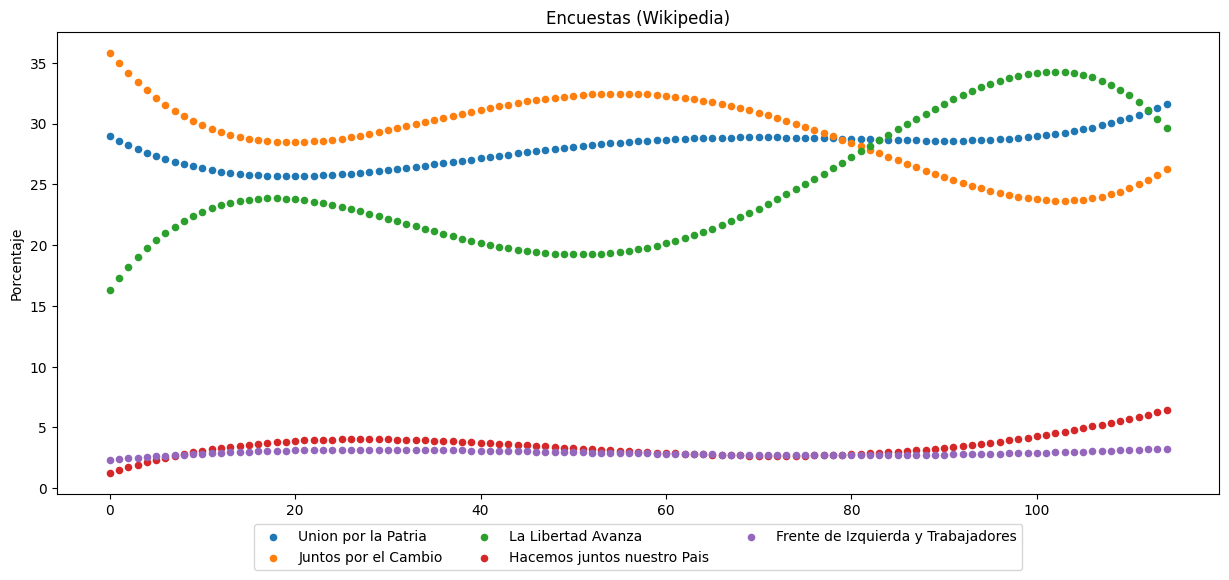

In [22]:
plt.figure(figsize=(15,6))
ejex = np.arange(len(encuestas_median))
for p in partidos:
    plt.scatter(ejex,encuestas_poly[p],label = p,s=20)
#plt.legend(loc='upper right',bbox_to_anchor=(1.4, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Encuestas (Wikipedia)')
plt.ylabel('Porcentaje')

In [23]:
encuestas_poly.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/getting_data/encuestas/encuestas_poly.csv',index=False)

# Ballotaje

In [24]:
partidos = ballojate.columns[:2]

In [25]:
partidos

Index(['La Libertad Avanza', 'Union por la Patria'], dtype='object')

In [26]:
grado = 3
encuestas_polinomio_partidos = []

Text(0, 0.5, 'Porcentaje')

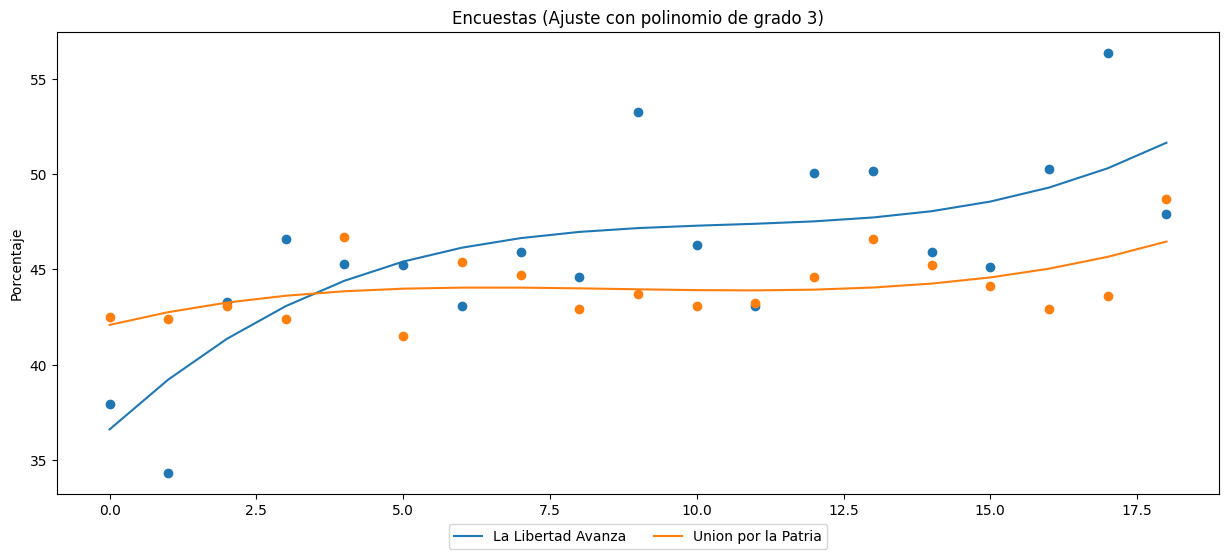

In [27]:
ejex = np.arange(len(ballotaje_median))
plt.figure(figsize=(15,6))
for p in partidos:
    
    poly_reg_model = LinearRegression()
    poly = PolynomialFeatures(degree=grado, include_bias=False)
    poly_features = poly.fit_transform(ejex.reshape(-1, 1))

    y = ballotaje_median[p].to_numpy()
    poly_reg_model.fit(poly_features, y)
    #X_=np.linspace(ejex.min(), ejex.max(), 200).reshape(-1, 1)
    Y_=poly_reg_model.predict(poly_features)

    encuestas_polinomio_partidos.append(Y_)

    plt.plot(ejex, Y_,label=p)
    plt.scatter(ejex,ballotaje_median[p])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=5)
plt.title('Encuestas (Ajuste con polinomio de grado 3)')
plt.ylabel('Porcentaje')

In [28]:
for i,p in enumerate(partidos):
    ballotaje_poly = ballotaje_median
    ballotaje_poly[p] = encuestas_polinomio_partidos[i]

Text(0, 0.5, 'Porcentaje')

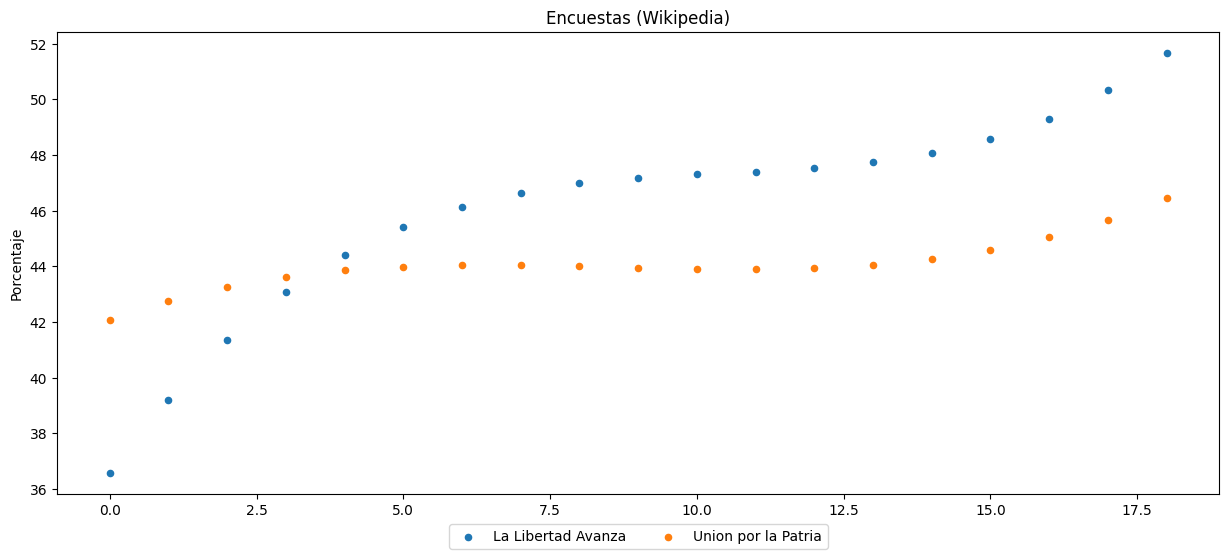

In [29]:
plt.figure(figsize=(15,6))
ejex = np.arange(len(ballotaje_median))
for p in partidos:
    plt.scatter(ejex,ballotaje_poly[p],label = p,s=20)
#plt.legend(loc='upper right',bbox_to_anchor=(1.4, 0.5))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
plt.title('Encuestas (Wikipedia)')
plt.ylabel('Porcentaje')